In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

NameError: name 'inspect' is not defined

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


columns = inspector.get_columns('measurement')
print(columns)

columns = inspector.get_columns('measurement') print(columns)

# Exploratory Climate Analysis

In [ ]:

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

alldata = engine.execute('SELECT * FROM measurement WHERE date >= "2016-10-27" AND date < "2017-10-27"').fetchall()
alldata_df = pd.DataFrame.from_dict(alldata)  
alldata_df.columns = ['a','station','date','precipitation','tobs']

#alldata_df.head()
# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores
mo12data = engine.execute('SELECT date,prcp FROM measurement WHERE date >= "2016-10-27" AND date < "2017-10-27"').fetchall()
#print(mo12data)
data2yrsago = mo12data
#print(data2yrsago)
# Save the query results as a Pandas DataFrame and set the index to the date column
date2_df = pd.DataFrame.from_dict(data2yrsago)
#date2_df.head(10)
date2_df.columns = ['date','precipitation']
#date2_df.head()
bydate_df = date2_df.set_index('date', inplace=False)
#bydate_df.head()

alldata_df.head()

,a,station,date,precipitation,tobs
0,2429,USC00519397,2016-10-27,0.00,77.0
1,2430,USC00519397,2016-10-28,0.00,78.0
2,2431,USC00519397,2016-10-29,0.00,77.0
3,2432,USC00519397,2016-10-30,0.24,76.0
4,2433,USC00519397,2016-10-31,0.03,77.0


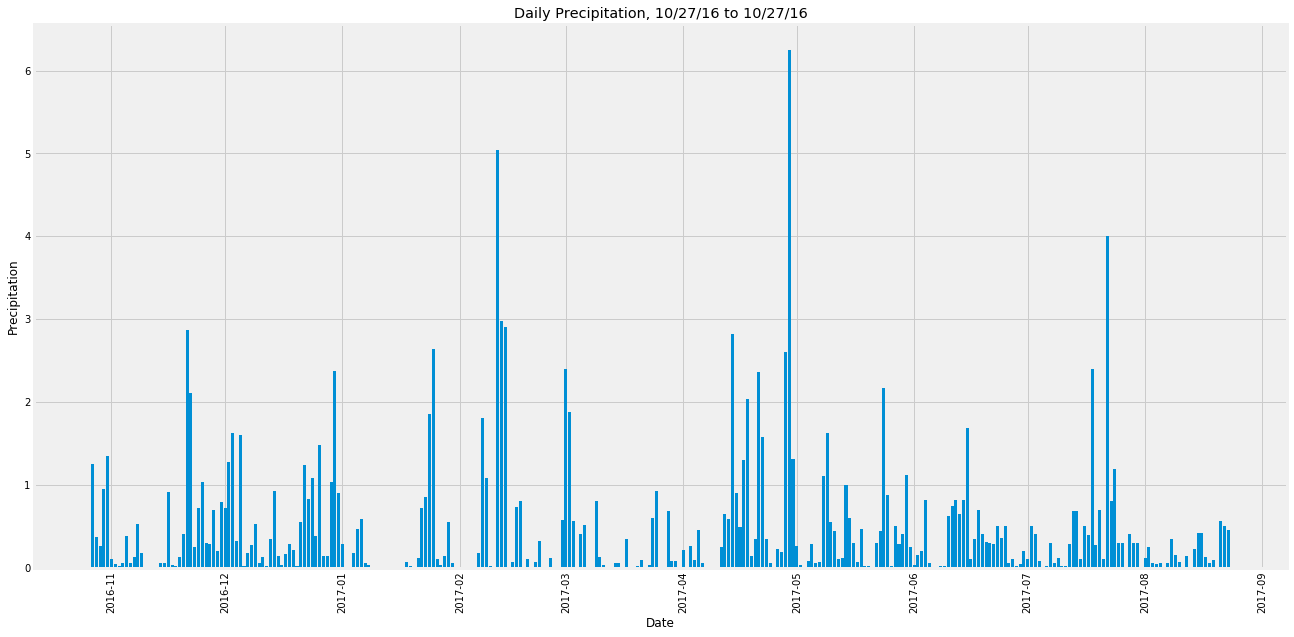

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
new_df = date2_df.reset_index()
new_df.head()
x1 = new_df['date'].tolist()
x2 = pd.to_datetime(x1,infer_datetime_format=True)
y1 = new_df['precipitation'].tolist()

plt.figure(figsize=(20,10))

plt.bar(x2, y1)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Daily Precipitation, 10/27/16 to 10/27/16')
plt.xticks(rotation=90)
plt.show()

# Rotate the xticks for the dates

![precipitation](Images/precipitation.png)

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
description = new_df['precipitation'].describe()
description_df = pd.DataFrame.from_dict(description)
description_df


,precipitation
count,1646.000000
mean,0.165595
std,0.431122
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


In [19]:
# How many stations are available in this dataset?
alldata_df.groupby('station').count()
print(len('station'))

7


In [20]:
# What are the most active stations?
#alldata_df.sort_values(['station','precipitation'], axis=0, ascending=False)
#counts_df = alldata_df.groupby(['date'], ascending=0 )
alldata_df['station'].value_counts()

USC00519397    296
USC00519281    287
USC00516128    285
USC00513117    278
USC00519523    274
USC00514830    252
USC00517948    144
Name: station, dtype: int64

In [21]:
# List the stations and the counts in descending order.
alldata_df['station'].value_counts()

USC00519397    296
USC00519281    287
USC00516128    285
USC00513117    278
USC00519523    274
USC00514830    252
USC00517948    144
Name: station, dtype: int64

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
easydata = engine.execute('SELECT * FROM measurement WHERE date >= "2016-10-27" AND date < "2017-10-27" AND station ="USC00519397"').fetchall()
easydata_df = pd.DataFrame.from_dict(easydata)
easydata_df.columns = ['a', 'station','date','precipitation','tobs']

temps = easydata_df['tobs'].tolist()
tmin = min(temps)
tmax = max(temps)
tavg = sum(temps)/len(temps)
print(f'TMIN = {tmin}')
print(f'TMAX = {tmax}')
print(f'TAVG = {tavg}')

TMIN = 60.0
TMAX = 87.0
TAVG = 74.45270270270271


In [23]:
# Choose the station with the highest number of temperature observations.


# Query the last 12 months of temperature observation data for this station 
easydata2 = engine.execute('SELECT * FROM measurement WHERE date >= "2016-10-27" AND date < "2017-10-27" AND station ="USC00519397"').fetchall()
#print(easydata2)



C:\Users\micha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


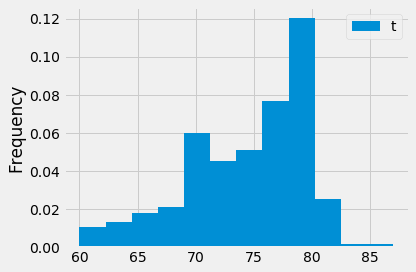

In [24]:
#and plot the results as a histogram
easydata2_df = pd.DataFrame.from_dict(easydata2)
temp = easydata2_df[4].tolist()
#print(temp)
plt.hist(temp, normed=True, bins=12)
plt.ylabel('Frequency')
plt.legend('tobs')
plt.tight_layout()
plt.show()

In [25]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#PICKED 10 DAYS FROM THE START OF THE YEAR


print(calc_temps('2016-10-28', '2017-10-28'))

[(58.0, 73.8783858485351, 87.0)]


-7.569999999999993
4.430000000000007


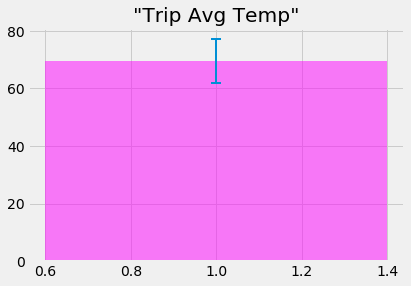

In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title

D = 69.57
yerr = 62.0 - D
print(yerr)
yerr1 = 74.0 - D
print(yerr1)
yerr2 = [yerr,yerr1]
plt.title('"Trip Avg Temp"')
plt.bar(1, D, alpha=0.5, color='magenta')
plt.errorbar(1, 69.57, yerr = yerr, lw=2, capsize=5, capthick=2)

plt.show()

# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [28]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
easydata3 = engine.execute('SELECT date, station, prcp FROM measurement WHERE date >= "2016-10-27" AND date < "2017-10-27"').fetchall()
easydata_df3 = pd.DataFrame.from_dict(easydata3)
easydata_df3.columns = ['date','station','precipitation']
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
easydata_df3
 
# stations = engine.execute('select * from measurement a join station b on a.station=b.station').fetchall()
# #print(stations)
# station_df = pd.DataFrame.from_dict(stations)
# #station_df
#same_sporder = session.query(station,measurement).filter(station.station == measurement.station).limit(10).all()

# easydata_df3.head()

# #easydata_df4 = easydata_df3.join(station_df, axis=0, join='outer', keys='station')
# # station_df.columns = ['a', 'station','name','latitude','longitude','elevation']
# # station_df


,date,station,precipitation
0,2016-10-27,USC00519397,0.00
1,2016-10-28,USC00519397,0.00
2,2016-10-29,USC00519397,0.00
3,2016-10-30,USC00519397,0.24
4,2016-10-31,USC00519397,0.03
5,2016-11-01,USC00519397,0.00
6,2016-11-02,USC00519397,0.00
7,2016-11-03,USC00519397,0.00
8,2016-11-04,USC00519397,0.00
9,2016-11-05,USC00519397,0.00


## Optional Challenge Assignment

In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [31]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [32]:
# Plot the daily normals as an area plot with `stacked=False`


In [34]:
from flask import Flask, jsonify


#app = Flask(__name__)

hello_dict = engine.execute('SELECT date, tobs FROM measurement WHERE date >= "2016-10-27" AND date < "2017-10-27"').fetchall()
hello_dict_df = hello_dict
print(hello_dict)


# @app.route(`/api/v1.0/precipitation`)
# def precipitation():
#     return "Whale Hello There"


# @app.route("/normal")
# def normal():
#     return hello_dict


# @app.route("/jsonified")
# def jsonified():
#     return jsonify(hello_dict)


# if __name__ == "__main__":
#     app.run(debug=True)


[('2016-10-27', 77.0), ('2016-10-28', 78.0), ('2016-10-29', 77.0), ('2016-10-30', 76.0), ('2016-10-31', 77.0), ('2016-11-01', 77.0), ('2016-11-02', 77.0), ('2016-11-03', 77.0), ('2016-11-04', 77.0), ('2016-11-05', 76.0), ('2016-11-06', 75.0), ('2016-11-07', 71.0), ('2016-11-08', 71.0), ('2016-11-09', 71.0), ('2016-11-10', 71.0), ('2016-11-11', 72.0), ('2016-11-12', 71.0), ('2016-11-13', 72.0), ('2016-11-14', 77.0), ('2016-11-15', 77.0), ('2016-11-16', 77.0), ('2016-11-17', 77.0), ('2016-11-18', 77.0), ('2016-11-19', 75.0), ('2016-11-20', 76.0), ('2016-11-21', 76.0), ('2016-11-22', 75.0), ('2016-11-23', 72.0), ('2016-11-24', 74.0), ('2016-11-25', 75.0), ('2016-11-26', 73.0), ('2016-11-27', 76.0), ('2016-11-28', 75.0), ('2016-11-29', 68.0), ('2016-11-30', 75.0), ('2016-12-01', 75.0), ('2016-12-02', 72.0), ('2016-12-03', 69.0), ('2016-12-04', 71.0), ('2016-12-05', 68.0), ('2016-12-06', 67.0), ('2016-12-07', 69.0), ('2016-12-08', 73.0), ('2016-12-09', 70.0), ('2016-12-10', 70.0), ('2016-12